# Vizualize Diff of contexts
* For all of the metrics one by one

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
metric = 'NSS'

In [4]:

df = pd.read_csv(metric+'_mean_noface.csv', index_col=[0])
df_f03 = pd.read_csv(metric+'_mean_face_03.csv', index_col=[0])
df_f05 = pd.read_csv(metric+'_mean_face_05.csv', index_col=[0])
df_f07 = pd.read_csv(metric+'_mean_face_07.csv', index_col=[0])

### Calculate means

In [5]:
def calc_means(df):
    df = df.transpose()
    df['mean model'] = df.mean(axis=1)
    df = df.transpose()
    df['mean context'] = df.mean(axis=1)
    return df

In [6]:
df0 = df.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0

,all,person,no person,animal,sports,electronic
aim,0.588971,0.594158,0.427543,0.532391,0.678230,0.605716
cas,0.652920,0.659682,0.442462,0.621640,0.894343,0.655160
covsal,0.791076,0.800697,0.491619,0.823930,0.759261,0.807721
gbvs,0.933246,0.940672,0.702105,0.934488,1.003845,0.952838
icf,0.915737,0.927365,0.553851,0.847769,1.036985,0.921737
ik,0.554114,0.560610,0.354069,0.538079,0.679347,0.602399
sun,0.390576,0.393891,0.287422,0.274271,0.383208,0.426072


In [7]:
df_f07

,all,person,no person,animal,sports,electronic
aim,1.113878,1.134873,0.460467,0.989111,1.188138,1.116267
cas,1.117061,1.137702,0.474658,0.990519,1.274021,1.111828
covsal,1.214884,1.237775,0.502464,1.156195,1.246500,1.230901
gbvs,1.266817,1.286157,0.664905,1.190142,1.349086,1.280326
icf,1.197391,1.218562,0.538472,1.062169,1.320616,1.212364
ik,1.115981,1.138736,0.407771,1.004669,1.211599,1.135472
sun,1.043254,1.064648,0.377417,0.857635,1.057420,1.060940


In [8]:
df_diff_f03 = ((df_f03 - df0) / df0)*100
df_diff_f05 = ((df_f05 - df0) / df0)*100
df_diff_f07 = ((df_f07 - df0) / df0)*100

In [9]:
df_diff_f03

,all,person,no person,animal,sports,electronic
aim,39.189720,39.808437,12.429584,37.188219,31.433435,35.367823
cas,24.433951,24.794122,7.721464,19.994569,15.243279,23.582166
covsal,23.463650,23.773458,7.759805,17.949901,25.703335,22.663555
gbvs,14.544067,14.822215,2.945991,11.140242,13.470619,13.790811
icf,15.993836,16.170453,6.790118,12.570962,13.933886,16.432808
ik,47.566644,48.172998,16.803136,37.603520,36.436656,41.766347
sun,69.100831,70.196588,22.365683,77.453655,65.013896,62.809994


In [10]:
df_diff_f03 = calc_means(df_diff_f03)
df_diff_f05 = calc_means(df_diff_f05)
df_diff_f07 = calc_means(df_diff_f07)

In [11]:
df_diff_f07

,all,person,no person,animal,sports,electronic,mean context
aim,89.122680,91.005225,7.700747,85.786557,75.182117,84.288648,72.180996
cas,71.086999,72.462179,7.276527,59.339563,42.453372,69.703236,53.720313
covsal,53.573710,54.587101,2.205950,40.326885,64.172936,52.391746,44.543055
gbvs,35.743109,36.727373,-5.298294,27.357672,34.391938,34.369757,27.215259
icf,30.756993,31.400497,-2.776815,25.289929,27.351550,31.530403,23.925426
ik,101.399071,103.124514,15.167312,86.714158,78.347683,88.491848,78.874098
sun,167.106076,170.289938,31.311121,212.695825,175.939035,149.004955,151.057825
mean model,78.398377,79.942404,7.940935,76.787227,71.119804,72.825799,64.502424


In [12]:
mean_context_diff_f03 = df_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = df_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = df_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
aim,32.569536,56.775886,72.180996
cas,19.294925,36.846774,53.720313
covsal,20.218951,35.845097,44.543055
gbvs,11.785657,21.230616,27.215259
icf,13.648677,21.841388,23.925426
ik,38.058217,64.505226,78.874098
sun,61.156774,110.849146,151.057825
mean model,28.104677,49.699162,64.502424


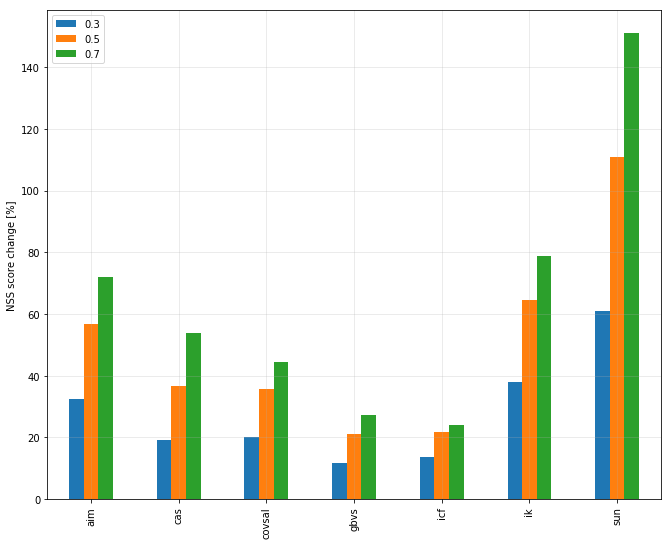

In [13]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

fig, ax = plt.subplots(figsize=(11,9));
mean_context_diff.plot.bar(ax=ax);
plt.grid(alpha=0.3)
# plt.title('Weight of face influence')
plt.ylabel(metric+' score change [%]');

plt.savefig('../plots/'+metric+'_improvment_mean_contexts.png', bbox_inches='tight', pad_inches=0)

In [14]:
mean_model_diff_f03 = df_diff_f03.loc['mean model']
mean_model_diff_f05 = df_diff_f05.loc['mean model']
mean_model_diff_f07 = df_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
all,33.470386,59.490978,78.398377
person,33.962610,60.473555,79.942404
no person,10.973683,14.659679,7.940935
animal,30.557295,56.218928,76.787227
sports,28.747872,52.202662,71.119804
electronic,30.916215,55.149167,72.825799
mean context,28.104677,49.699162,64.502424


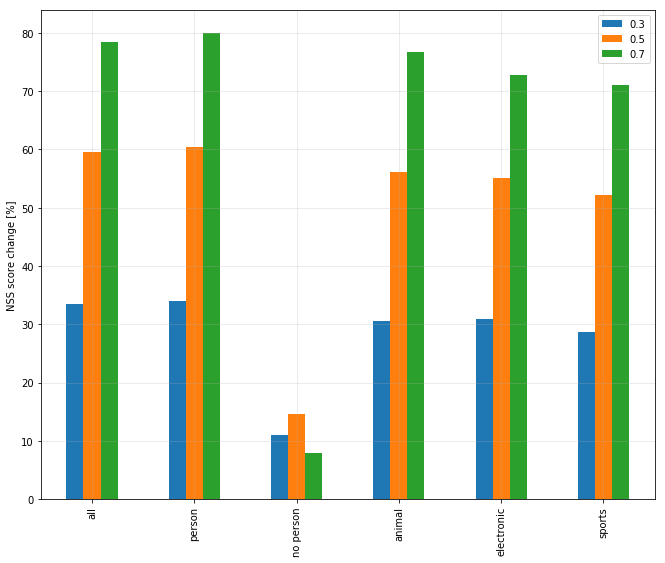

In [15]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(11,9));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)

# plt.title('Weight of face influence')
plt.ylabel(metric+' score change [%]');

plt.savefig('../plots/'+metric+'_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)